# Učení s učitelem (Supervised Learning)

Skript používá logistickou regresi pro klasifikaci dvou tříd. Model se učí z označených dat – to znamená, že trénovací data obsahují i správné výstupy (labely). Cílem modelu je naučit se rozhodovací hranici, která rozdělí prostor vstupních proměnných na základě trénovacích příkladů.

Přesnost: 0.8333333333333334
Konfuzní matice:
 [[26  6]
 [ 4 24]]


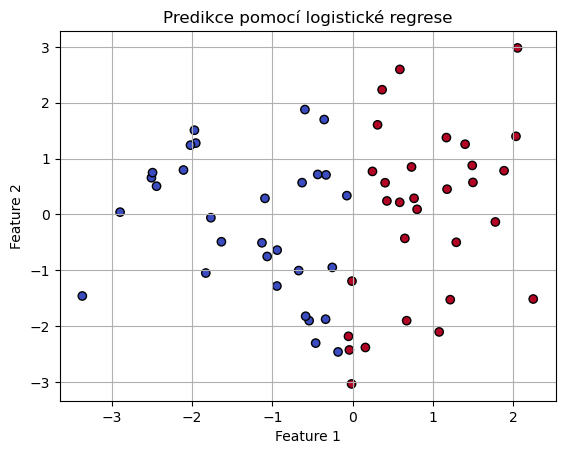

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Generování syntetických dat
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Rozdělení dat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trénink modelu
model = LogisticRegression()
model.fit(X_train, y_train)

# Predikce a vyhodnocení
y_pred = model.predict(X_test)
print("Přesnost:", accuracy_score(y_test, y_pred))
print("Konfuzní matice:\n", confusion_matrix(y_test, y_pred))

# Vizualizace
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Predikce pomocí logistické regrese")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


# Učení bez učitele (Unsupervised Learning)

Skript ukazuje použití algoritmu KMeans, který hledá přirozené skupiny (shluky) v datech. Nepoužívá se žádné označení výstupních dat – algoritmus automaticky hledá strukturu v datech.

/opt/anaconda3/envs/CondaAiProjectTF210/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


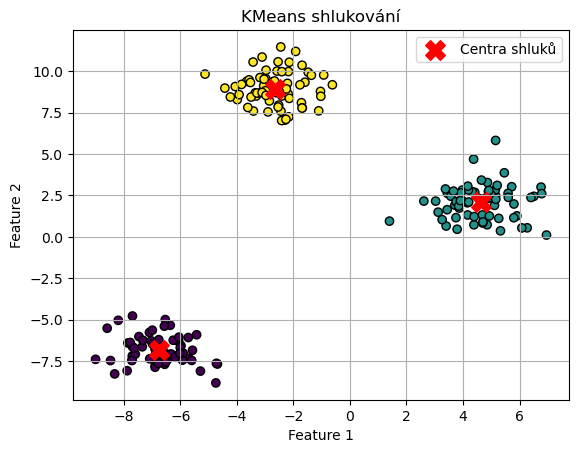

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generování dat
X, y = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

# Aplikace KMeans
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Vizualizace
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centra shluků')
plt.title("KMeans shlukování")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# Posilované učení (Reinforcement Learning)

Skript používá prostředí CartPole z knihovny gym. V tomto typu učení agent provádí akce v prostředí a za každou dostává odměnu. Cílem je maximalizovat celkovou odměnu.

Epizoda 1 skončila po 34 krocích s odměnou 34.0
Epizoda 2 skončila po 18 krocích s odměnou 18.0
Epizoda 3 skončila po 12 krocích s odměnou 12.0
Epizoda 4 skončila po 12 krocích s odměnou 12.0
Epizoda 5 skončila po 18 krocích s odměnou 18.0
Epizoda 6 skončila po 16 krocích s odměnou 16.0
Epizoda 7 skončila po 22 krocích s odměnou 22.0
Epizoda 8 skončila po 10 krocích s odměnou 10.0
Epizoda 9 skončila po 24 krocích s odměnou 24.0
Epizoda 10 skončila po 15 krocích s odměnou 15.0


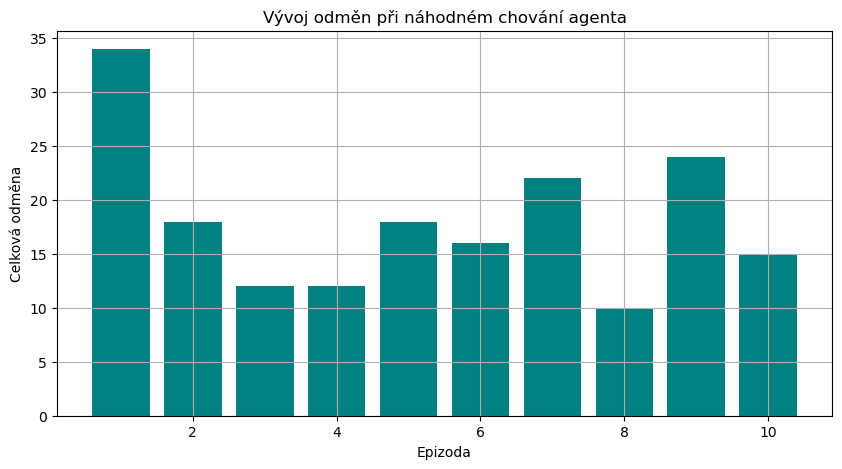

In [4]:
import gym
import matplotlib.pyplot as plt
import time

env = gym.make("CartPole-v1", render_mode="human")  # první epizoda vizuálně
EPISODES = 10
rewards_all = []

for episode in range(EPISODES):
    obs, _ = env.reset(seed=42 + episode)
    done = False
    total_reward = 0
    steps = 0

    while not done:
        if episode == 0:
            env.render()
            time.sleep(0.05)

        action = env.action_space.sample()  # náhodná akce
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        steps += 1

    print(f"Epizoda {episode + 1} skončila po {steps} krocích s odměnou {total_reward}")
    rewards_all.append(total_reward)

env.close()

# 📈 Vykreslení odměn za jednotlivé epizody
plt.figure(figsize=(10, 5))
plt.bar(range(1, EPISODES + 1), rewards_all, color='teal')
plt.xlabel("Epizoda")
plt.ylabel("Celková odměna")
plt.title("Vývoj odměn při náhodném chování agenta")
plt.grid(True)
plt.show()



Tento příklad demonstruje základní princip Q-learningu – jednoduché techniky posilovaného učení, kdy si agent pamatuje odměny za jednotlivé akce ve stavech pomocí tzv. Q-tabulek. S každou epizodou se jeho strategie zlepšuje. Učí se maximalizovat budoucí odměnu výběrem akcí, které vedou ke stavu s nejvyšší očekávanou hodnotou.

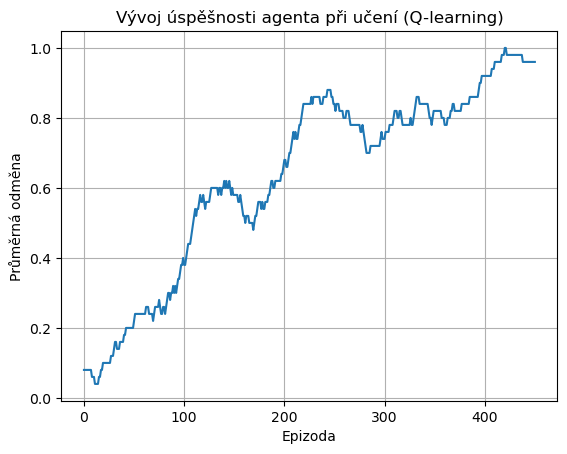

In [17]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", is_slippery=False)  # prostředí bez náhody
n_states = env.observation_space.n
n_actions = env.action_space.n

# Inicializace Q-tabulek
Q = np.zeros((n_states, n_actions))

# Hyperparametry
alpha = 0.8      # learning rate
gamma = 0.95     # discount factor
epsilon = 1.0    # počáteční průzkum
decay = 0.995    # postupné snižování epsilonu

episodes = 500
rewards = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        # Vyber akci (průzkum nebo využití)
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning aktualizace
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        Q[state][action] += alpha * (td_target - Q[state][action])

        state = next_state
        total_reward += reward

    rewards.append(total_reward)
    epsilon *= decay  # snižujeme průzkum

# 📈 Vykreslení úspěšnosti
plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'))  # klouzavý průměr
plt.xlabel("Epizoda")
plt.ylabel("Průměrná odměna")
plt.title("Vývoj úspěšnosti agenta při učení (Q-learning)")
plt.grid(True)
plt.show()
